#BUILDING MLP

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from random import shuffle

import numpy as np
import pandas as pd
import sys
import struct
import csv
import os
import matplotlib.pyplot as plt
from random import shuffle


# open the csv file, shuffle, and transform into suitable Attribute and class 
# vectors

wbc = pd.read_csv('bankmarketing.csv')

# shuffle
wbc = wbc.sample(frac=1)

X = wbc.iloc[:,1:9]
y = wbc.iloc[:,10]

# splitting up training and testing data into appropriate vectors for initial 
# group

X_train, X_test, y_train, y_test = train_test_split(X, y)



In [2]:
# INITIAL GROUP PRE-PROCESSING | MLP


# Preprocessing - standardize and normalize with sklearn build-in fcn

stdScaler = StandardScaler()

stdScaler.fit(X_train)

X_train = stdScaler.transform(X_train)
X_test = stdScaler.transform(X_test)



In [6]:

# BUILDING THE INITIAL MLP


# I built the Multilayer Perceptron using sklearn

# Instantiate MLPClassifier with adjusted max_iter
mlp = MLPClassifier(max_iter=20)  

# initialize our Multilayer Perceptron
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

# fit the neural network model
nn.fit(X_train, y_train)

#create a vector of the actual predictions
predictions = nn.predict(X_test)

# print a confusion matrix visual
print(confusion_matrix(y_test,predictions))

# print a table that identifies prediction outputs
print(classification_report(y_test,predictions))

print("Total MLP model accuracy: " + str(accuracy_score(y_test, predictions, 
                                                        normalize=True, 
                                                        sample_weight=None)))


[[2712  207  225  135    0   73    0    0   21    0    0    0]
 [ 548  645   46   94    0   16    0    0   23    0    0    0]
 [ 492   63  683  347    0   93    0    0   35    0    0    0]
 [ 172   11  218 1108    0   61    0    0   30    0    1    0]
 [  28    5   38  101    0   16    0    0   13    0    0    0]
 [ 305   10  253  258    0  138    0    0   24    0    0    0]
 [   9    0   21   30    0    3    0    0    6    0    0    0]
 [  99    1   97  118    0   18    0    0   23    0    0    0]
 [ 193    1  163  218    0   26    0    0   31    0    1    0]
 [  24    0   19   60    0   16    0    0    9    0    0    0]
 [ 428    2   99  122    1   68    0    0   14    0    0    0]
 [  23    7   30   57    0    6    0    0   11    0    1    0]]
              precision    recall  f1-score   support

           0       0.54      0.80      0.65      3373
           1       0.68      0.47      0.56      1372
           2       0.36      0.40      0.38      1713
           3       0.42   

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incre

KeyboardInterrupt: 

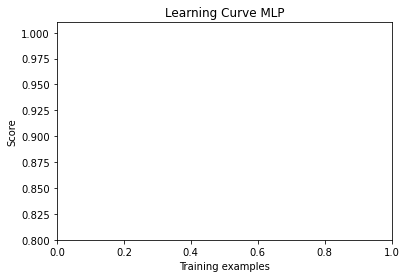

In [7]:
# LEARNING CURVE USING SKLEARN


import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# The plot_learning_curve function defined below is from sklearn
# Here is the source 
# https://scikit-learn.org/stable/auto_examples/model_selection/
# plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Testing score")

    plt.legend(loc="best")
    return plt

title = "Learning Curve MLP"
estimator = nn
plot_learning_curve(estimator, title, X, y, (0.8, 1.01))

plt.show()

# From the learning curve plot, we can determine that this data is not linearly 
# separable as the Perceptron does not converge.  This means that we will need
# at least one hidden layer.  As one hidden layer will do the job, the number of
# neurons in that hidden layer we would use would be as a rule of thumb
# around 3 - 5 times the amount of input neurons we have.



#BUILDING THE SVM

In [18]:

from sklearn import svm
from sklearn import metrics

# I built the Support Vector Machine using appropriate functions from sklearn
# libraries

vectorMachine = svm.SVC(kernel='linear')

#Train the model using the training sets
vectorMachine.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = vectorMachine.predict(X_test)

# Model Accuracy

print("Total SVM model accuracy: ", metrics.accuracy_score(y_test, y_pred))

# The Support Vector Machine is on average more accurate than the MLP 
# Classification

Total SVM model accuracy:  0.9371428571428572


In [19]:
# 5-FOLD CROSS VALIDATION - in order to test my Support Vector Machine accuracy


# split training and testing data into appropriate 5-fold vectors

X_for_Kfold = np.array(X_train)
             
y_for_Kfold = np.array(y_train)
kf = KFold(n_splits=5)
kf.get_n_splits(X)

for i, j in kf.split(X_for_Kfold):
   X_train2, X_test2 = X_for_Kfold[i], X_for_Kfold[j]
   y_train2, y_test2 = y_for_Kfold[i], y_for_Kfold[j]

  
# pre-process the data

stdScaler.fit(X_train2)

X_train2 = stdScaler.transform(X_train2)
X_test2 = stdScaler.transform(X_test2)

#Train the model using the training sets
vectorMachine.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred2 = vectorMachine.predict(X_test2)

# Model Accuracy

print("Total 5-fold SVM model accuracy: ", 
      metrics.accuracy_score(y_test2, y_pred2))

Total 5-fold SVM model accuracy:  0.9903846153846154
